In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

%run 'parse.ipynb'

# Load data

In [2]:
datadir = 'Behavioral-Analyzed-Data/training/'

In [3]:
folders=[datadir+s for s in os.listdir(datadir) if len(s) <= 2]
len(folders)

20

In [4]:
subjects = pd.DataFrame(folders,columns=['folder'])
subjects.index = [int(s.split('/')[-1]) for s in subjects.folder]
subjects.sort_index(inplace=True)
subjects.head()

,folder
1,Behavioral-Analyzed-Data/training/1
2,Behavioral-Analyzed-Data/training/2
3,Behavioral-Analyzed-Data/training/3
4,Behavioral-Analyzed-Data/training/4
5,Behavioral-Analyzed-Data/training/5


In [5]:
subj = doparse(1)

In [6]:
subjects['data'] = [doparse(data_type = 'training', subj=i) for i in subjects.index]
subjects.head()

,folder,data
1,Behavioral-Analyzed-Data/training/1,<__main__.Subject object at 0x7f5edb4d8f10>
2,Behavioral-Analyzed-Data/training/2,<__main__.Subject object at 0x7f5eb07396d0>
3,Behavioral-Analyzed-Data/training/3,<__main__.Subject object at 0x7f5eb0676210>
4,Behavioral-Analyzed-Data/training/4,<__main__.Subject object at 0x7f5eb06c64d0>
5,Behavioral-Analyzed-Data/training/5,<__main__.Subject object at 0x7f5eb0679650>


# Dimensionality reduction

In [7]:
# A Reducer takes in a Subject object, defined above, and a bool "isPre"
# and returns a numpy vector.
# Eventually, it will have performed useful reduction in the process.

In [8]:
def nullRSreducer(subj, isPre = True):
    if isPre:
        return subj.Pre_RS.values.flatten()
    else:
        return subj.Post_RS.values.flatten()

In [9]:
def nullFSreducer(subj, isPre = True):
    if isPre:
        return subj.Pre_FS.values.flatten()
    else:
        return subj.Post_FS.values.flatten()

# Similarity Matrices

In [10]:
def dist_func(vect1, vect2):
    return np.linalg.norm(vect1 - vect2)

In [17]:
reducer = nullFSreducer

In [18]:
subjects['reducedPre'] = [reducer(subj, True) for subj in subjects.data]
subjects['reducedPost'] = [reducer(subj, False) for subj in subjects.data]
subjects.head()
# subjects

,folder,data,reducedPre,reducedPost
1,Behavioral-Analyzed-Data/training/1,<__main__.Subject object at 0x7f5edb4d8f10>,"[0.0, 411.6548583, 245.835252436, 227.17283950...","[0.0, 438.531027467, 256.727595386, 340.524038..."
2,Behavioral-Analyzed-Data/training/2,<__main__.Subject object at 0x7f5eb07396d0>,"[0.0, 266.594594595, 83.2254616132, 87.4235924...","[0.0, 549.92690678, 86.6288461538, 118.7257844..."
3,Behavioral-Analyzed-Data/training/3,<__main__.Subject object at 0x7f5eb0676210>,"[0.0, 893.836875359, 209.549833095, 164.518681...","[0.0, 714.309027778, 115.080357143, 120.571847..."
4,Behavioral-Analyzed-Data/training/4,<__main__.Subject object at 0x7f5eb06c64d0>,"[0.0, 370.537787514, 456.880110243, 251.801619...","[0.0, 730.798572157, 511.17877338, 271.5162548..."
5,Behavioral-Analyzed-Data/training/5,<__main__.Subject object at 0x7f5eb0679650>,"[0.0, 744.692073171, 306.807620818, 136.982681...","[0.0, 702.096537251, 225.512285582, 110.604432..."


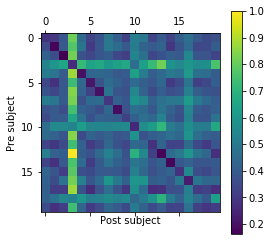

In [19]:
distMatrix = np.zeros([len(subjects), len(subjects)])
for i, pre in enumerate(subjects.reducedPre):
    for j, post in enumerate(subjects.reducedPost):
        distMatrix[i, j] = dist_func(pre, post)

distMatrix /= np.nanmax(distMatrix)

cax = plt.matshow(distMatrix)

plt.colorbar(cax)
# plt.title('Correlation between incomming and outgoing scans')
plt.xlabel('Post subject')
plt.ylabel('Pre subject')

plt.savefig('DistanceMap.png', dpi=500)

# Directionality modelling

# Results